# Problem statement
You are tasked with building a predictive model for a health insurance company to estimate the medical charges for their customers based on their demographic and lifestyle information. Accurate predictions of medical charges can help the company design better insurance plans, optimize pricing strategies, and identify high-risk individuals.

Objective:
Develop a linear regression model that predicts the medical charges (charges) based on the following features:

1. Age: The age of the individual.
2. Sex: The gender of the individual (male/female).
3. BMI: The body mass index, which is a measure of body fat based on height and weight.
4. Children: The number of dependents covered under the insurance plan.
5. Smoker: Whether the individual is a smoker (yes/no).
6. Region: The region where the individual resides (e.g., northeast, southeast, southwest, northwest).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
pwd

'C:\\Users\\alber\\Documents\\Data science\\My Notebooks\\linear_regression_wb2'

## Domain analysis

### **1. Dataset Overview**
This dataset pertains to the health insurance domain and provides information about individuals' demographics, lifestyle, and medical charges. The primary aim is to analyze and predict the cost of insurance claims based on the provided attributes.

---

### **2. Feature Breakdown and Importance**
1. **Age:**  
   - **Domain Meaning:** Represents the individual's age in years.  
   - **Impact:** Older individuals are more likely to incur higher medical expenses due to age-related health issues.  
   - **Example Insight:** Medical charges may increase with age, especially for senior citizens.

2. **Sex:**  
   - **Domain Meaning:** Indicates the gender of the individual (male/female).  
   - **Impact:** While gender might not directly influence charges, certain medical conditions or insurance policies might have different rates based on gender.  
   - **Example Insight:** Patterns of medical costs may vary slightly by gender.

3. **BMI (Body Mass Index):**  
   - **Domain Meaning:** A numerical value calculated from weight and height, indicating whether an individual is underweight, normal weight, overweight, or obese.  
   - **Impact:** Higher BMI values are often associated with obesity, which increases the risk of chronic illnesses like diabetes, heart disease, and hypertension, leading to higher medical charges.  
   - **Example Insight:** Charges might show a nonlinear increase as BMI crosses obesity thresholds.

4. **Children:**  
   - **Domain Meaning:** The number of dependents covered under the individual's insurance plan.  
   - **Impact:** Having more dependents can increase the overall insurance charges due to higher coverage.  
   - **Example Insight:** Families with more children might have slightly higher total charges.

5. **Smoker:**  
   - **Domain Meaning:** Indicates whether the individual smokes (yes/no).  
   - **Impact:** Smoking is a significant risk factor for numerous health issues, resulting in substantially higher medical charges.  
   - **Example Insight:** Smokers are likely to have significantly higher charges compared to non-smokers.

6. **Region:**  
   - **Domain Meaning:** The geographic location where the individual resides (northeast, southeast, southwest, northwest).  
   - **Impact:** Regional variations in medical costs, healthcare access, and insurance policies might affect charges.  
   - **Example Insight:** Certain regions might show higher average charges due to higher healthcare costs.

7. **Charges:**  
   - **Domain Meaning:** The total medical charges incurred by the individual.  
   - **Impact:** This is the target variable for prediction.  
   - **Example Insight:** Charges could vary greatly due to lifestyle factors (e.g., smoking), age, and BMI.

---

### **3. Key Relationships**
- **Age vs. Charges:** Older individuals generally incur higher medical expenses.  
- **BMI vs. Charges:** A nonlinear relationship where extremely low or high BMI values lead to higher charges.  
- **Smoker vs. Charges:** Smokers are expected to have much higher charges on average.  
- **Region vs. Charges:** Geographic differences may impact charges due to varying healthcare costs.  
- **Children vs. Charges:** A moderate increase in charges might be observed as the number of dependents increases.

---

### **4. Business Use Cases**
1. **Premium Pricing Models:**  
   - Use predictions of `charges` to develop more accurate insurance premium models tailored to individual risk profiles.

2. **Risk Assessment:**  
   - Identify high-risk individuals (e.g., smokers or those with high BMI) and offer targeted wellness programs to reduce future costs.

3. **Resource Allocation:**  
   - Predict medical expenses to allocate resources and budgets for claims management.

4. **Policy Design:**  
   - Offer customized plans for families, smokers, or individuals based on predictive insights.

---

### **5. Domain Challenges**
1. **Ethical Considerations:**  
   - Discriminatory pricing (e.g., based on gender or region) can raise ethical and legal concerns.
   
2. **Data Quality:**  
   - Missing, incorrect, or biased data can affect the model's performance.

3. **Complex Relationships:**  
   - Factors like BMI and charges may have nonlinear or interaction effects that require advanced techniques beyond simple linear regression.

4. **External Factors:**  
   - Economic, cultural, or healthcare policy changes might not be reflected in the dataset but can influence medical charges.

---

### **6. Key Questions to Explore**
- How much do lifestyle factors like smoking and BMI contribute to medical costs?  
- Are there significant regional differences in medical charges?  
- Can certain features (e.g., age and BMI) explain most of the variance in charges?  
- Are there outliers (e.g., extremely high charges) that need special attention?  

---

This domain analysis provides a holistic understanding of the dataset and its relevance in the health insurance industry.

## Basic checks

In [183]:
df = pd.read_csv('C:\\Users\\alber\\Documents\\Data science\\Data\\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [185]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [187]:
df.shape

(1338, 7)

In [189]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [193]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [195]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [197]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [199]:
# to check if there are unrealistic bmi values aka errors 
# assuming your dataset is stored in 'df' and BMI column is 'bmi'
invalid_bmi = df[(df['bmi'] < 10) | (df['bmi'] > 100) | (df['bmi'] <= 0)]
invalid_bmi

,age,sex,bmi,children,smoker,region,charges


In [201]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Exploratory data analysis

In [204]:
numerical_columns =df.select_dtypes(include=['int', 'float'])
numerical_columns

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


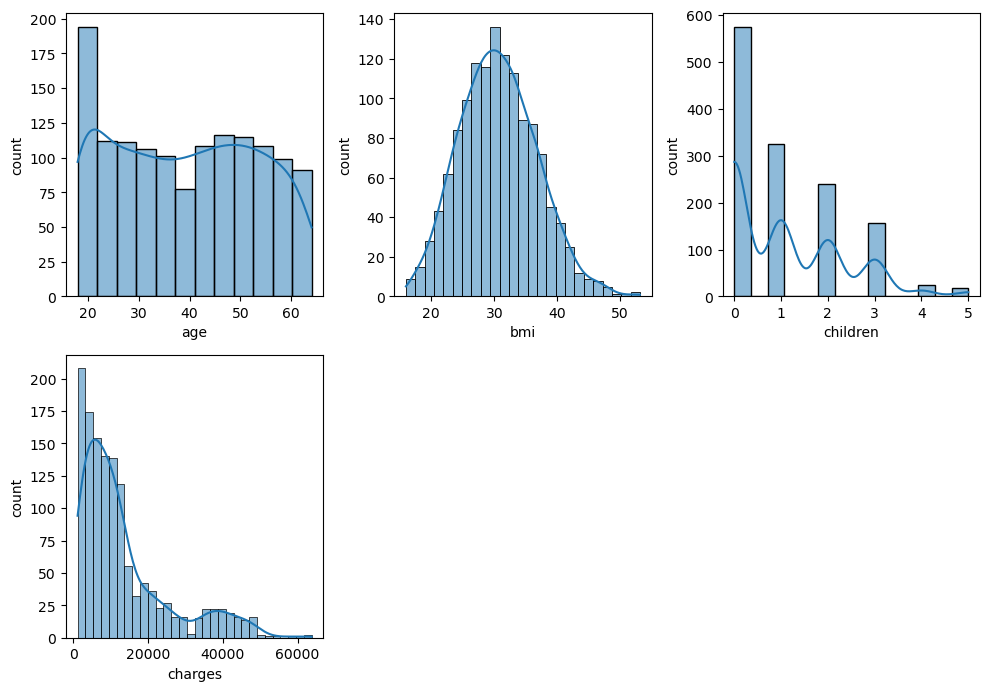

In [206]:
# univariate
plt.figure(figsize=(10,10))
plotnum=1
for column in numerical_columns:
    if plotnum <= 4:
        ax=plt.subplot(3,3,plotnum)
        sns.histplot(x=numerical_columns[column], kde=True)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('count')
    plotnum += 1
plt.tight_layout()

<Axes: xlabel='children', ylabel='charges'>

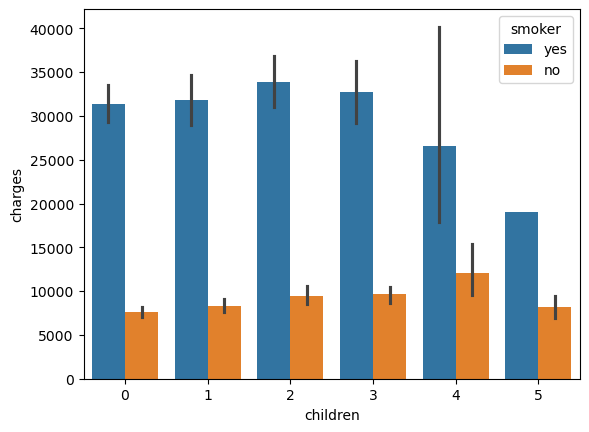

In [207]:
sns.barplot(data=df, x='children', y='charges', hue='smoker')

<Axes: xlabel='smoker', ylabel='charges'>

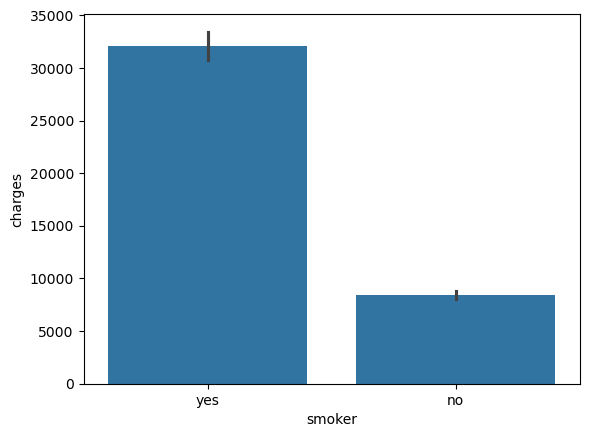

In [209]:
# smoker is a significant feature influencing the target variable
sns.barplot(data=df, x='smoker', y='charges')

<Axes: xlabel='age', ylabel='charges'>

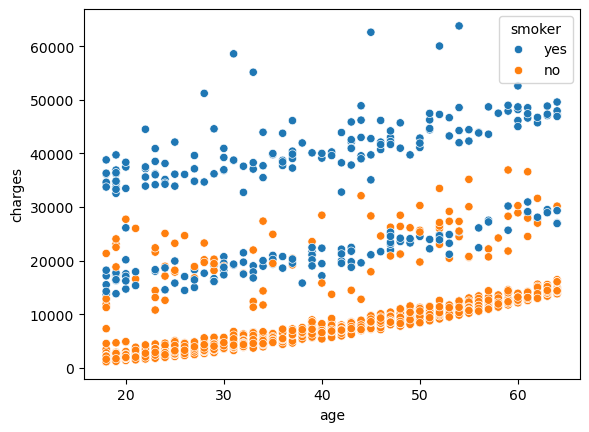

In [212]:
# bivariate
# analyse features against target
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')


<Axes: xlabel='bmi', ylabel='charges'>

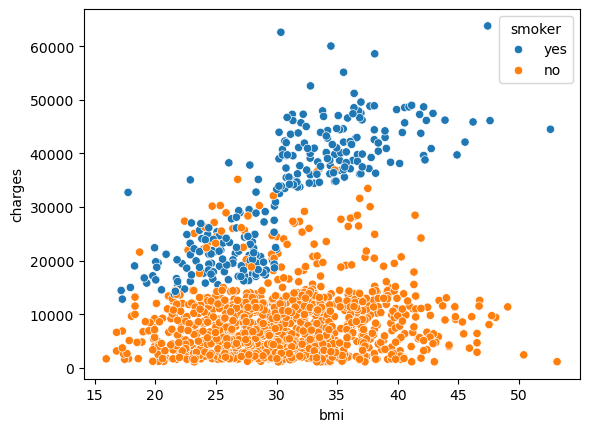

In [214]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')

<Axes: xlabel='charges', ylabel='Density'>

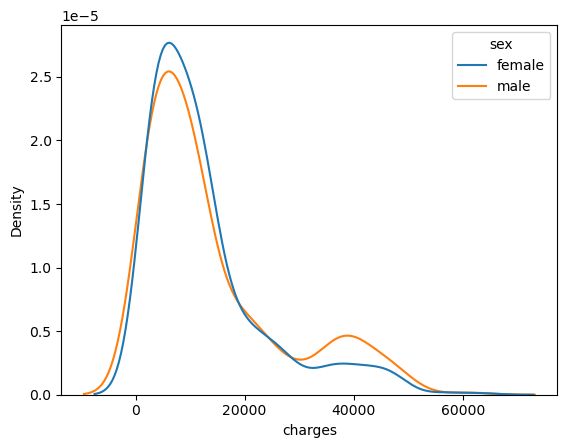

In [216]:
sns.kdeplot(data=df, x='charges', hue='sex')

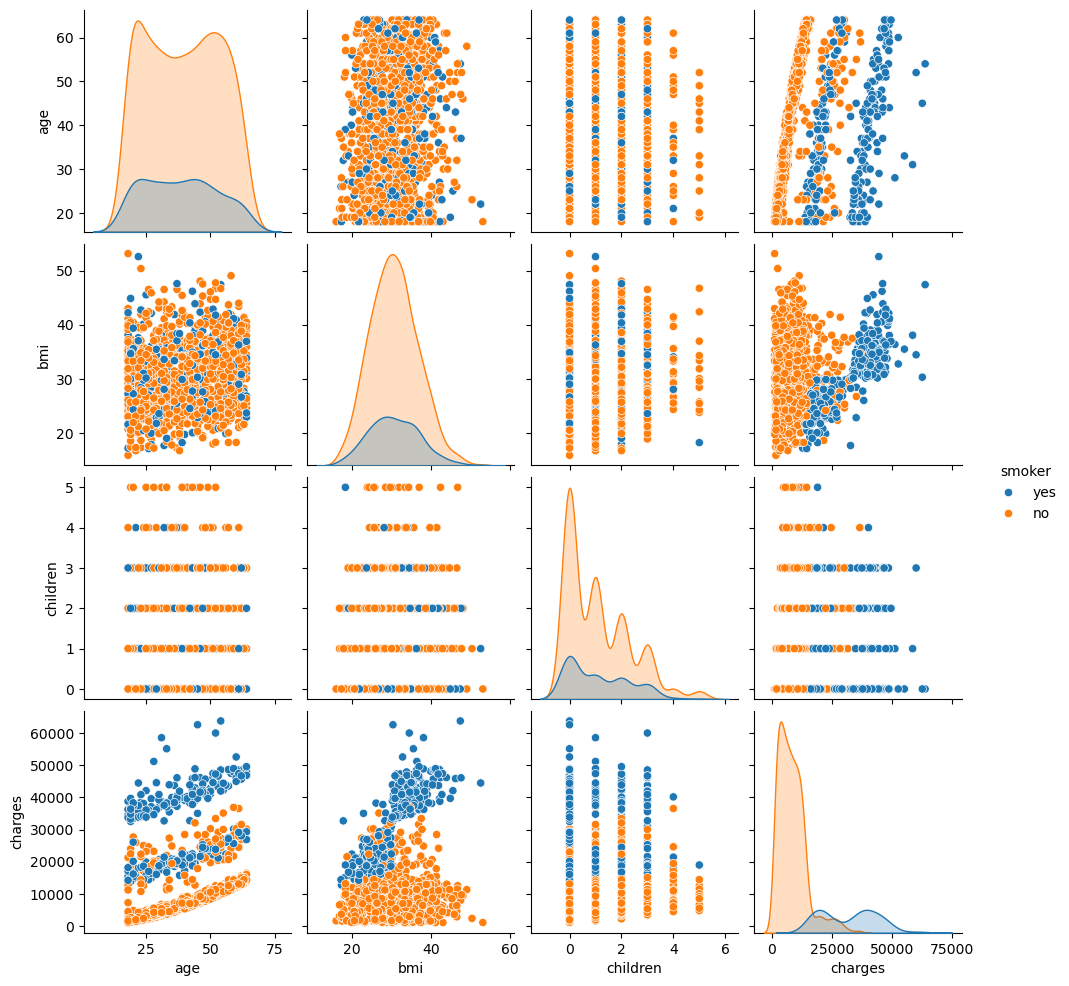

In [218]:
# multivariate
sns.pairplot(data=df, hue='smoker')

<Axes: xlabel='sex', ylabel='count'>

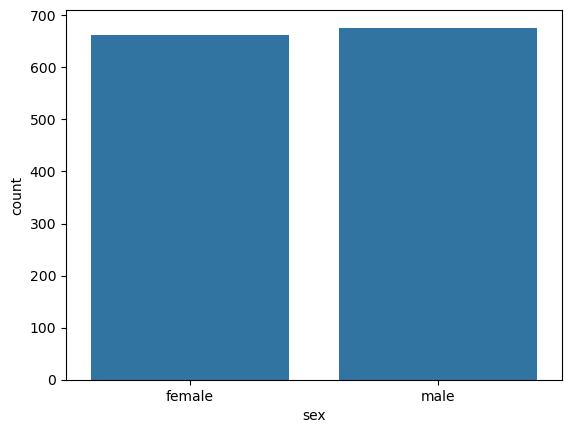

In [219]:
sns.countplot(data=df, x='sex')

<Axes: xlabel='region', ylabel='count'>

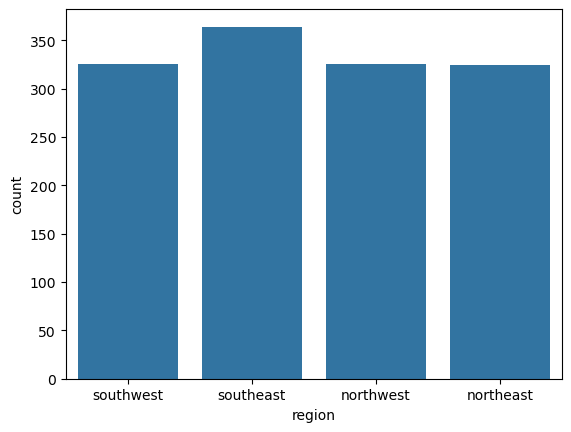

In [220]:
sns.countplot(data=df, x='region')

## Pre processing / data cleaning

In [222]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [223]:
df.isnull().values.any()

False

In [229]:
df.duplicated().sum()

1

In [231]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [233]:
filtered_data = df[(df['age'] == 19) & (df['sex'] == 'male') & (df['bmi'] == 30.59) & (df['children'] == 0)]
filtered_data

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [235]:
df.iloc[190:200]

,age,sex,bmi,children,smoker,region,charges
190,61,male,31.57,0,no,southeast,12557.6053
191,36,female,26.20,0,no,southwest,4883.8660
192,25,male,25.74,0,no,southeast,2137.6536
193,56,female,26.60,1,no,northwest,12044.3420
194,18,male,34.43,0,no,southeast,1137.4697
195,19,male,30.59,0,no,northwest,1639.5631
196,39,female,32.80,0,no,southwest,5649.7150
197,45,female,28.60,2,no,southeast,8516.8290
198,51,female,18.05,0,no,northwest,9644.2525
199,64,female,39.33,0,no,northeast,14901.5167


In [237]:
df.iloc[575:585]

,age,sex,bmi,children,smoker,region,charges
575,58,female,27.170,0,no,northwest,12222.89830
576,22,male,26.840,0,no,southeast,1664.99960
577,31,female,38.095,1,yes,northeast,58571.07448
578,52,male,30.200,1,no,southwest,9724.53000
579,25,female,23.465,0,no,northeast,3206.49135
580,59,male,25.460,1,no,northeast,12913.99240
581,19,male,30.590,0,no,northwest,1639.56310
582,39,male,45.430,2,no,southeast,6356.27070
583,32,female,23.650,1,no,southeast,17626.23951
584,19,male,20.700,0,no,southwest,1242.81600


In [239]:
df.shape

(1338, 7)

In [241]:
df.drop_duplicates(inplace=True)

In [243]:
df.duplicated().sum()

0

In [245]:
df.shape

(1337, 7)

In [247]:
filtered_data = df[(df['sex'] == 'male') & (df['children'] == 0) & (df['age'] == 19) & (df['bmi'] == 30.59)]
filtered_data

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631


In [249]:
# index needs resetting, see rows 580, 582 (581 was dropped earlier)
df.iloc[575:585]

,age,sex,bmi,children,smoker,region,charges
575,58,female,27.170,0,no,northwest,12222.89830
576,22,male,26.840,0,no,southeast,1664.99960
577,31,female,38.095,1,yes,northeast,58571.07448
578,52,male,30.200,1,no,southwest,9724.53000
579,25,female,23.465,0,no,northeast,3206.49135
580,59,male,25.460,1,no,northeast,12913.99240
582,39,male,45.430,2,no,southeast,6356.27070
583,32,female,23.650,1,no,southeast,17626.23951
584,19,male,20.700,0,no,southwest,1242.81600
585,33,female,28.270,1,no,southeast,4779.60230


In [251]:
df = df.reset_index(drop=True)

In [255]:
# index resetted
df.iloc[575:585]

,age,sex,bmi,children,smoker,region,charges
575,58,female,27.170,0,no,northwest,12222.89830
576,22,male,26.840,0,no,southeast,1664.99960
577,31,female,38.095,1,yes,northeast,58571.07448
578,52,male,30.200,1,no,southwest,9724.53000
579,25,female,23.465,0,no,northeast,3206.49135
580,59,male,25.460,1,no,northeast,12913.99240
581,39,male,45.430,2,no,southeast,6356.27070
582,32,female,23.650,1,no,southeast,17626.23951
583,19,male,20.700,0,no,southwest,1242.81600
584,33,female,28.270,1,no,southeast,4779.60230


In [257]:
df.shape

(1337, 7)

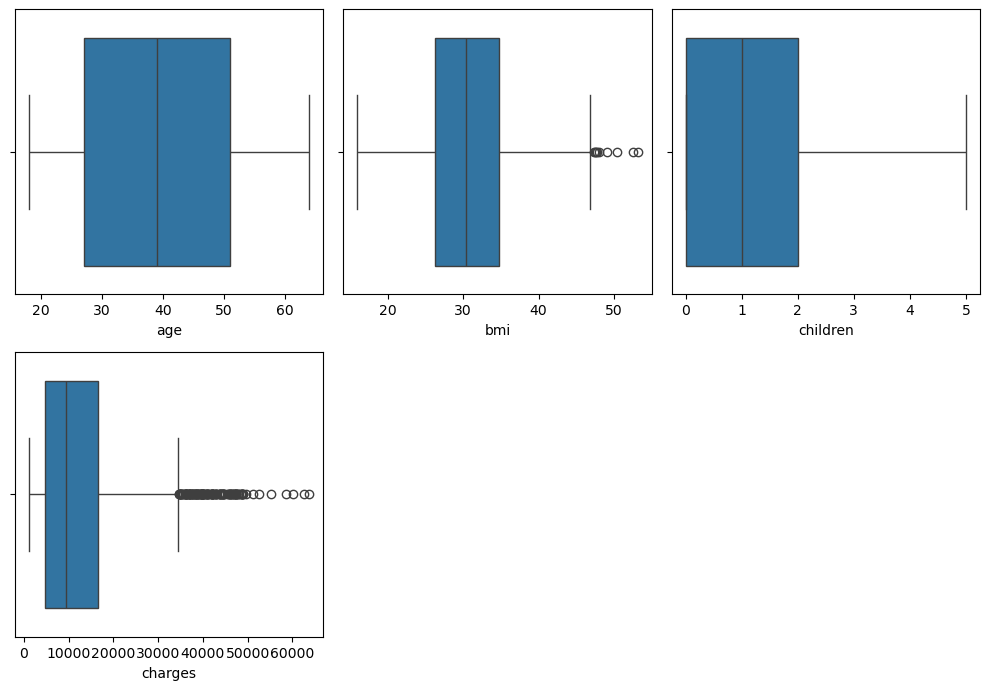

In [259]:
# check for outliers
numerical_columns =df.select_dtypes(include=['int', 'float'])

plt.figure(figsize=(10,10))
plotnum=1
for column in numerical_columns:
    if plotnum <= 4:
        ax=plt.subplot(3,3,plotnum)
        sns.boxplot(x=numerical_columns[column])
        plt.xlabel(column,fontsize=10)
        
    plotnum += 1
plt.tight_layout()

<Axes: xlabel='bmi', ylabel='Count'>

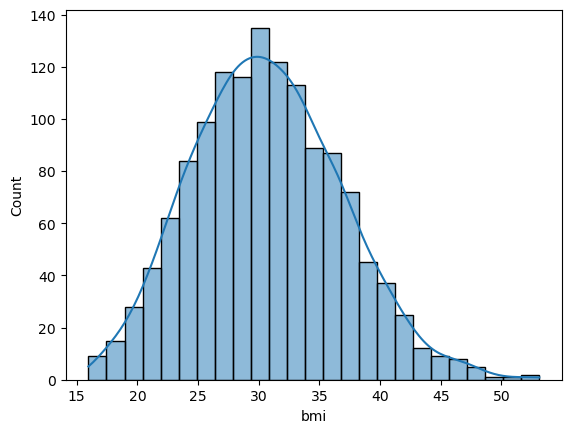

In [261]:
# no skew
# normal distribution - mean appox. equal to median
# symmetric distribution
sns.histplot(df['bmi'], kde=True)

In [263]:
df['bmi'].mean()

30.66345175766642

In [265]:
df['bmi'].median()

30.4

<Axes: xlabel='charges', ylabel='Count'>

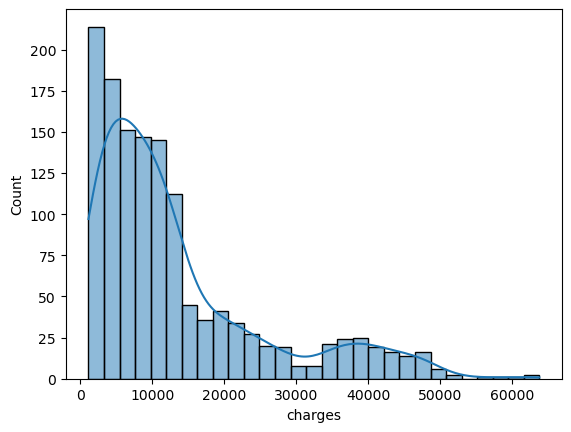

In [267]:
# positive skew - mean is greater than median
# more lower values, but few high extreme values pulling right tail to right side
# asymmetric distribution
sns.histplot(df['charges'], kde=True)

In [269]:
df['charges'].mean()

13279.121486655948

In [271]:
df['charges'].median()

9386.1613

In [273]:
outliers = df[['bmi', 'charges']]
outliers.columns

Index(['bmi', 'charges'], dtype='object')

In [275]:
Q1 = outliers.quantile(0.25)
print(Q1)
Q3 = outliers.quantile(0.75)
print(Q3)

bmi          26.290
charges    4746.344
Name: 0.25, dtype: float64
bmi           34.70000
charges    16657.71745
Name: 0.75, dtype: float64


In [277]:
IQR = Q3-Q1
IQR

bmi            8.41000
charges    11911.37345
dtype: float64

In [279]:
# lower limit
l = Q1 - (1.5*IQR)
l

bmi           13.675000
charges   -13120.716175
dtype: float64

In [281]:
# upper limit
u = Q3 + (1.5*IQR)
u

bmi           47.315000
charges    34524.777625
dtype: float64

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [285]:
len(outliers)

1337

In [287]:
len(df['charges'])

1337

In [289]:
l_perc = (outliers<l).sum()/len(outliers)*100
l_perc

bmi        0.0
charges    0.0
dtype: float64

In [291]:
u_perc = (outliers>u).sum()/len(outliers)*100
u_perc

bmi         0.673149
charges    10.396410
dtype: float64

In [293]:
# total percentage
perc = l_perc + u_perc
perc

bmi         0.673149
charges    10.396410
dtype: float64

In [295]:
perc[perc<5]

bmi    0.673149
dtype: float64

In [297]:
# no data below lower limit
df[df['bmi']<13.675000]

,age,sex,bmi,children,smoker,region,charges


In [299]:
# data present above upper limit
df[df['bmi']>47.315000]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
846,23,male,50.38,1,no,southeast,2438.05520
859,37,female,47.60,2,yes,southwest,46113.51100
1046,22,male,52.58,1,yes,southeast,44501.39820
1087,52,male,47.74,1,no,southeast,9748.91060
1316,18,male,53.13,0,no,southeast,1163.46270


In [301]:
# replacing with median
df.loc[df['bmi']>u['bmi'], 'bmi'] = df['bmi'].median()

In [303]:
df[df['bmi']>47.315000]

,age,sex,bmi,children,smoker,region,charges


<Axes: xlabel='bmi'>

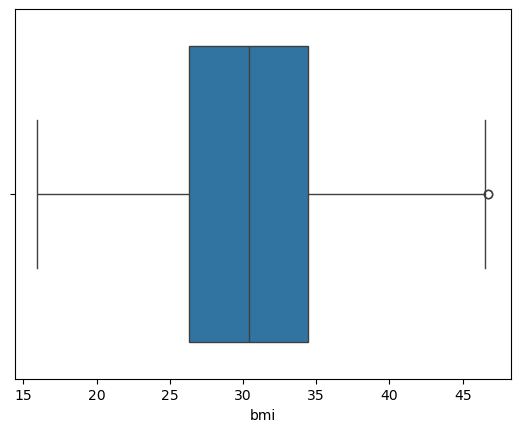

In [305]:
sns.boxplot(x=df['bmi'])

<Axes: xlabel='charges'>

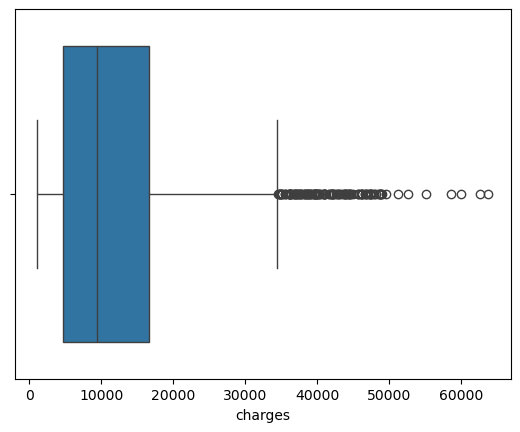

In [307]:
sns.boxplot(x=df['charges'])

In [309]:
df.shape

(1337, 7)

In [311]:
# encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [313]:
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])

In [315]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [317]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [319]:
df.shape

(1337, 7)

In [321]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
region_encoded = ohe.fit_transform(df[['region']])
redf = pd.DataFrame(region_encoded, columns=ohe.get_feature_names_out(['region']))
df = pd.concat([df, redf], axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,1.0,0.0,0.0


In [323]:
df = df.drop('region', axis=1)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,1.0,0.0,0.0


In [325]:
df.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [327]:
df[df.isnull().any(axis=1)]

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest


In [329]:
df.shape

(1337, 9)

In [331]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,1.0,0.0,0.0


In [333]:
df.tail()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
1332,50,1,30.97,3,0,10600.5483,1.0,0.0,0.0
1333,18,0,31.92,0,0,2205.9808,0.0,0.0,0.0
1334,18,0,36.85,0,0,1629.8335,0.0,1.0,0.0
1335,21,0,25.80,0,0,2007.9450,0.0,0.0,1.0
1336,61,0,29.07,0,1,29141.3603,1.0,0.0,0.0


In [335]:
# scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [337]:
columns_to_scale = ['age', 'bmi', 'children', 'charges']
df[columns_to_scale] = sc.fit_transform(df[columns_to_scale])

In [339]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,0.021739,0,0.387788,0.0,1,0.251611,0.0,0.0,1.0
1,0.000000,1,0.578435,0.2,0,0.009636,0.0,1.0,0.0
2,0.217391,1,0.553426,0.6,0,0.053115,0.0,1.0,0.0
3,0.326087,1,0.219065,0.0,0,0.333010,1.0,0.0,0.0
4,0.304348,1,0.419617,0.0,0,0.043816,1.0,0.0,0.0


## Feature engineering

Keeping all features as they are valuable information and no multicollinearity is present.

<Axes: >

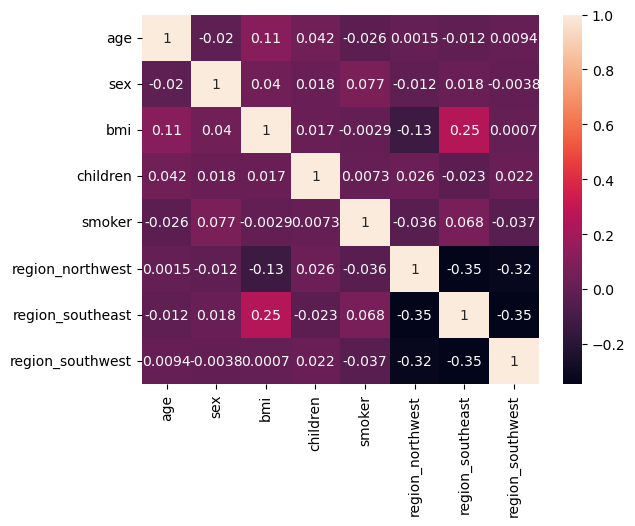

In [342]:
sns.heatmap(df.drop('charges', axis=1).corr(), annot=True)

## Model building

In [345]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,0.021739,0,0.387788,0.0,1,0.251611,0.0,0.0,1.0
1,0.000000,1,0.578435,0.2,0,0.009636,0.0,1.0,0.0
2,0.217391,1,0.553426,0.6,0,0.053115,0.0,1.0,0.0
3,0.326087,1,0.219065,0.0,0,0.333010,1.0,0.0,0.0
4,0.304348,1,0.419617,0.0,0,0.043816,1.0,0.0,0.0


In [347]:
x = df.drop('charges', axis=1)
y = df['charges']

In [351]:
x.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,0.021739,0,0.387788,0.0,1,0.0,0.0,1.0
1,0.000000,1,0.578435,0.2,0,0.0,1.0,0.0
2,0.217391,1,0.553426,0.6,0,0.0,1.0,0.0
3,0.326087,1,0.219065,0.0,0,1.0,0.0,0.0
4,0.304348,1,0.419617,0.0,0,1.0,0.0,0.0


In [353]:
y.head()

0    0.251611
1    0.009636
2    0.053115
3    0.333010
4    0.043816
Name: charges, dtype: float64

In [355]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [357]:
x_train.shape

(935, 8)

In [359]:
x_test.shape

(402, 8)

In [361]:
y_train.shape

(935,)

In [363]:
y_test.shape

(402,)

In [365]:
from sklearn.linear_model import LinearRegression

In [371]:
model = LinearRegression()

In [373]:
model.fit(x_train, y_train)

LinearRegression()

In [379]:
y_pred = model.predict(x_test)

In [381]:
model.coef_

array([ 0.18356615, -0.00055154,  0.16783162,  0.04084195,  0.36494079,
       -0.00756858, -0.0133112 , -0.01256265])

In [383]:
model.intercept_

-0.04860519008753186

## Model evaluation

In [386]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [388]:
mse = mean_squared_error(y_test, y_pred)
mse

0.010156284363757264

In [390]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.06752285892471313

In [392]:
rmse = np.sqrt(mse)
rmse

0.10077839234556812

In [394]:
r2_score(y_test, y_pred)

0.7670503825300062

## Result

1. **R² score** of 0.767 means that approximately **76.7%** of the variance in charges is explained by the features (age, sex, BMI, children, smoker, region).
   
2. **0.767** is generally considered a good R² score for many real-world datasets, especially when predicting complex variables like medical charges. In the context of healthcare, where multiple factors affect charges (e.g., age, smoking status, region), it's not always easy to achieve very high R² values.

 
3. **Context matters** and if features that are more directly related to medical charges were available (e.g., health conditions, prescriptions), the R² could potentially be higher. However, with the current features, 76.7% explained variance suggests a solid model.

4. **Smoker variable** has the most significant impact on medical charges as medical charges are expected to increase by 0.3649 which is the smoker feature coefficient. It is not surprising given that smoking is often linked with higher health costs.